# Aircraft Detection

- Get Pleiades imagery for the given airports
- Execute tiling and aircraft detection blocks via parallel jobs
- Visualize the results

- The example costs around 1700 UP42 credits

## Setup

Import required libraries

In [14]:
import up42
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from shapely.geometry import box

Configure areas of interest

In [15]:
aoi_txl = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{},
                "geometry":{"type":"Polygon","coordinates":[[[13.286740779876709,52.5509016976356],
                                                             [13.300495147705078,52.5509016976356],
                                                             [13.300495147705078,52.556890079685594],
                                                             [13.286740779876709,52.556890079685594],
                                                             [13.286740779876709,52.5509016976356]]]}}]}
aoi_muc = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{},
                "geometry":{"type":"Polygon","coordinates":[[[11.789016723632812,48.348577346994944],
                                                             [11.809401512145996,48.348577346994944],
                                                             [11.809401512145996,48.360155725059116],
                                                             [11.789016723632812,48.360155725059116],
                                                             [11.789016723632812,48.348577346994944]]]}}]}


aois = [{'title': 'TXL', 'geometry': aoi_txl},
        {'title': 'MUC', 'geometry': aoi_muc}]

Authenticate with UP42

In [16]:
#up42.authenticate(project_id="123", project_api_key="456")
up42.authenticate(cfg_file="config.json")
up42.settings(log=False)

2020-12-03 13:49:53,328 - Got credentials from config file.
2020-12-03 13:49:53,769 - Authentication with UP42 successful!
2020-12-03 13:49:53,770 - Logging disabled - use up42.settings(log=True) to reactivate.


## Catalog Search

Search cloudfree Pleiades image for the two aois and visualise the quicklooks.


---------TXL---------



100%|██████████| 3/3 [00:02<00:00,  1.34it/s]


,geometry,id,acquisitionDate,constellation,providerName,blockNames,cloudCoverage,up42:usageType,providerProperties,sceneId
0,"POLYGON ((13.20640 52.58098, 13.20616 52.45458...",c5497393-8f8d-4367-9527-c39344e220fe,2020-04-28T10:31:35Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",2.31,"[DATA, ANALYTICS]","{'commercialReference': 'SO20025725', 'acquisi...",DS_PHR1B_202004281031350_FR1_PX_E013N52_0513_0...
1,"POLYGON ((13.21800 52.58082, 13.21860 52.45684...",07e5eaba-7830-4aee-8c27-6b69fa1da89f,2020-04-23T10:19:52Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"[DATA, ANALYTICS]","{'commercialReference': 'SO20022129', 'acquisi...",DS_PHR1B_202004231019525_FR1_PX_E013N52_0513_0...
2,"POLYGON ((13.20760 52.58274, 13.20828 52.45502...",11616f18-4002-44fc-bfeb-571c6657ccf4,2020-04-17T10:16:45Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.40,"[DATA, ANALYTICS]","{'commercialReference': 'SO20017653', 'acquisi...",DS_PHR1A_202004171016453_FR1_PX_E013N52_0513_0...


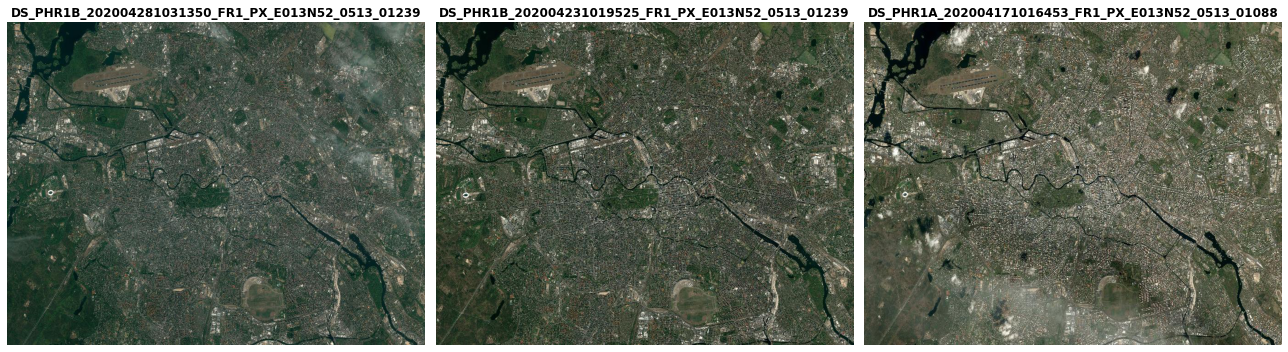


---------MUC---------



100%|██████████| 3/3 [00:01<00:00,  1.71it/s]


,geometry,id,acquisitionDate,constellation,providerName,blockNames,cloudCoverage,up42:usageType,providerProperties,sceneId
0,"POLYGON ((11.62946 48.39067, 11.62967 48.29748...",0e324d95-47df-48f7-9a49-76a9aaa93362,2020-04-16T10:25:42Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.00,"[DATA, ANALYTICS]","{'commercialReference': 'SO20017376', 'acquisi...",DS_PHR1B_202004161025425_FR1_PX_E011N48_1009_0...
1,"POLYGON ((11.63674 48.40241, 11.63713 48.31271...",b9d55cf6-6a6b-4a41-9998-0fc69e1d4515,2020-04-11T10:14:13Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.08,"[DATA, ANALYTICS]","{'commercialReference': 'SO20016407', 'acquisi...",DS_PHR1B_202004111014133_FR1_PX_E011N48_1009_0...
2,"POLYGON ((11.64703 48.39837, 11.64731 48.30483...",6573a62a-819b-4d2e-b27d-8bbd904e6549,2020-04-10T10:20:58Z,PHR,oneatlas,"[oneatlas-pleiades-fullscene, oneatlas-pleiade...",0.05,"[DATA, ANALYTICS]","{'commercialReference': 'SO20015930', 'acquisi...",DS_PHR1A_202004101020584_FR1_PX_E011N48_1009_0...


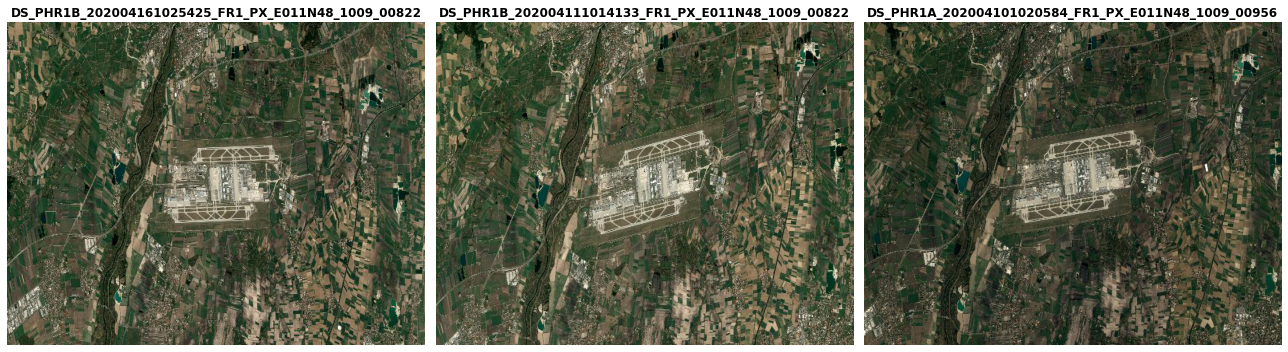

In [17]:
catalog = up42.initialize_catalog()


for aoi in aois:
    print("\n---------" + aoi["title"] + "---------\n")
    search_paramaters = catalog.construct_parameters(geometry=aoi['geometry'], 
                                                     start_date="2020-04-01",
                                                     end_date="2020-04-30",
                                                     sensors=["pleiades"],
                                                     max_cloudcover=10,
                                                     sortby="acquisitionDate",
                                                     ascending=False,
                                                     limit=3)
    search_results = catalog.search(search_paramaters)
    
    # Download & Visualise quicklooks
    catalog.download_quicklooks(image_ids=search_results.id.to_list(), sensor="pleiades")
    display(search_results.head())
    catalog.plot_quicklooks(figsize=(18,5), titles=search_results.sceneId.to_list())

    # Select least cloud scene for further workflow
    aoi["sceneId"] = search_results.sceneId.to_list()[0]

In [18]:
# Optional: Select ideal scenes manually
aois[0]["sceneId"] = "DS_PHR1B_202004281031350_FR1_PX_E013N52_0513_01239"
aois[1]["sceneId"] = "DS_PHR1B_202004161025425_FR1_PX_E011N48_1009_00822"

## Download selected Pleiades images for aois

In [19]:
up42.settings(log=True)
project = up42.initialize_project()

# Increase the parallel job limit for the project.
#project.update_project_settings(max_concurrent_jobs=10)

2020-12-03 13:50:26,653 - Initialized Project(name: Dark vessels, project_id: 2db3c170-7772-4bef-9344-2182421e2938, description: Project used for the AIS webinar, createdAt: 2020-11-25T08:08:47.717742Z)


Create or update a workflow for the aircraft detection

In [20]:
workflow = project.create_workflow("Aircraft detection", use_existing=True)

2020-12-03 13:50:29,843 - Getting existing workflows in project ...
2020-12-03 13:50:30,223 - Got 4 workflows for project 2db3c170-7772-4bef-9344-2182421e2938.
100%|██████████| 4/4 [00:01<00:00,  2.95it/s]
2020-12-03 13:50:31,585 - Using existing workflow: Aircraft detection - ab3d5000-3ed2-4ee6-9102-777b02023557


Add or update workflows tasks

In [21]:
#up42.get_blocks(basic=True)
input_tasks= ['oneatlas-pleiades-aoiclipped', 'tiling', 'orbital_pleiades_aircraft']
workflow.add_workflow_tasks(input_tasks=input_tasks)
workflow

2020-12-03 13:50:44,959 - Added tasks to workflow: [{'name': 'oneatlas-pleiades-aoiclipped:1', 'parentName': None, 'blockId': '18d09f1a-3197-4c27-a15a-54d099c31435'}, {'name': 'tiling:1', 'parentName': 'oneatlas-pleiades-aoiclipped:1', 'blockId': '3e146dd6-2b67-4d6e-a422-bb3d973e32ff'}, {'name': 'orbital_pleiades_aircraft:1', 'parentName': 'tiling:1', 'blockId': '4f2f3438-d31b-4872-ab15-ce50160dd70e'}]


Workflow(name: Aircraft detection, workflow_id: ab3d5000-3ed2-4ee6-9102-777b02023557, description: , createdAt: 2020-11-26T10:45:20.484070Z, project_id: 2db3c170-7772-4bef-9344-2182421e2938, workflow_tasks: {'oneatlas-pleiades-aoiclipped:1': '2.1.5', 'tiling:1': '2.2.3', 'orbital_pleiades_aircraft:1': '1.1.2-public'}

### Run jobs in parallel

Construct workflow input parameters & run jobs

In [22]:
input_parameters_list = []

for aoi in aois:
    input_parameters = workflow.construct_parameters(geometry=aoi['geometry'], 
                                                     geometry_operation="bbox", 
                                                     scene_ids=[aoi["sceneId"]])
    input_parameters['tiling:1']['tile_width']  = 1024
    input_parameters['tiling:1']['tile_height'] = 1024
    input_parameters_list.append(input_parameters)

input_parameters_list

[{'oneatlas-pleiades-aoiclipped:1': {'limit': 1,
   'zoom_level': 18,
   'max_cloud_cover': 100,
   'panchromatic_band': False,
   'ids': ['DS_PHR1B_202004281031350_FR1_PX_E013N52_0513_01239'],
   'bbox': [13.286740779876709,
    52.5509016976356,
    13.300495147705078,
    52.556890079685594]},
  'tiling:1': {'tile_width': 1024,
   'tile_height': 1024,
   'match_extents': False,
   'output_prefix': '',
   'augmentation_factor': 1,
   'discard_empty_tiles': True},
  'orbital_pleiades_aircraft:1': {}},
 {'oneatlas-pleiades-aoiclipped:1': {'limit': 1,
   'zoom_level': 18,
   'max_cloud_cover': 100,
   'panchromatic_band': False,
   'ids': ['DS_PHR1B_202004161025425_FR1_PX_E011N48_1009_00822'],
   'bbox': [11.789016723632812,
    48.348577346994944,
    11.809401512145996,
    48.360155725059116]},
  'tiling:1': {'tile_width': 1024,
   'tile_height': 1024,
   'match_extents': False,
   'output_prefix': '',
   'augmentation_factor': 1,
   'discard_empty_tiles': True},
  'orbital_pleiades_

In [23]:
jobs = workflow.run_jobs_parallel(input_parameters_list=input_parameters_list)

2020-12-03 13:51:00,682 - Selected input_parameters: {'oneatlas-pleiades-aoiclipped:1': {'limit': 1, 'zoom_level': 18, 'max_cloud_cover': 100, 'panchromatic_band': False, 'ids': ['DS_PHR1B_202004281031350_FR1_PX_E013N52_0513_01239'], 'bbox': [13.286740779876709, 52.5509016976356, 13.300495147705078, 52.556890079685594]}, 'tiling:1': {'tile_width': 1024, 'tile_height': 1024, 'match_extents': False, 'output_prefix': '', 'augmentation_factor': 1, 'discard_empty_tiles': True}, 'orbital_pleiades_aircraft:1': {}}.
2020-12-03 13:51:02,699 - Created and running new job: 2af9c0d1-2fdb-4bf7-a7fd-bd36676f0f41
2020-12-03 13:51:03,050 - Selected input_parameters: {'oneatlas-pleiades-aoiclipped:1': {'limit': 1, 'zoom_level': 18, 'max_cloud_cover': 100, 'panchromatic_band': False, 'ids': ['DS_PHR1B_202004161025425_FR1_PX_E011N48_1009_00822'], 'bbox': [11.789016723632812, 48.348577346994944, 11.809401512145996, 48.360155725059116]}, 'tiling:1': {'tile_width': 1024, 'tile_height': 1024, 'match_extents'

### Download & Visualise results

In [ ]:
jobs.download_results()

In [32]:
for aoi, job in zip(aois, jobs):
    planes=job.get_results_json(as_dataframe=True)
    print(f"{aoi['title']}: {planes.shape[0]} planes detected")
    display(job.map_results())

2020-12-04 08:28:39,544 - Retrieved 17 features.


TXL: 17 planes detected


2020-12-04 08:28:40,106 - Retrieved 76 features.


MUC: 76 planes detected
